<a href="https://colab.research.google.com/github/Sriyanka24/Analysis-on-US-Accidents-Dataset/blob/main/Analysis_on_US_Accidents_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#US Accidents Data Analysis


##Environment setup

In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! kaggle datasets download -d sobhanmoosavi/us-accidents

100% 268M/269M [00:01<00:00, 217MB/s]
100% 269M/269M [00:01<00:00, 209MB/s]


In [3]:
! unzip "/content/us-accidents.zip" -d "/content/data"

Archive:  /content/us-accidents.zip
  inflating: /content/data/US_Accidents_Dec21_updated.csv  


In [4]:
data_path = '/content/data/US_Accidents_Dec21_updated.csv'

##Data Preparation and Cleaning

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
#% matplotlib inline

In [7]:
df = pd.read_csv(data_path)

In [8]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [9]:
df.shape
#almost 3 millon rows 

(2845342, 47)

In [10]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [11]:
#datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [12]:
#perform some stats on numerical dataset
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [13]:
#counting number of missing values in each column and sorting them in descending order
missing_value = df.isna().sum().sort_values(ascending=False)
missing_value

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

In [14]:
#converting value to percent to get better idea of data
percent_missing = (missing_value/ len(df))* 100
percent_missing

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
Country                   0.000000
Junction                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                

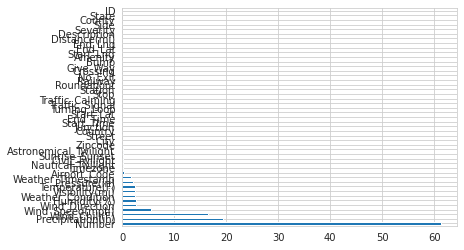

In [15]:
percent_missing.plot(kind='barh')

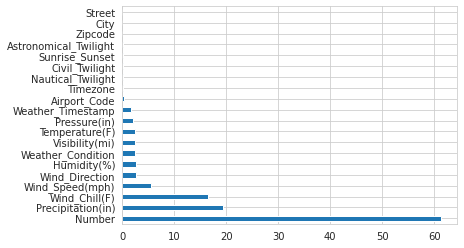

In [16]:
#the above bar chart doesnt give better understanding as there are lot of columns with missing values
#so we plot only the columns without missing values
percent_missing[percent_missing!=0].plot(kind='barh')

##Exploratory Data Analysis(EDA) and Visualization

In [17]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

I picked 3 columns to continue my analysis
1. City
2. Start_Time
3. Start_Lat, Start_Lng

###City

In [18]:
df.City

0               Dublin
1               Dayton
2           Cincinnati
3                Akron
4           Cincinnati
              ...     
2845337      Riverside
2845338      San Diego
2845339         Orange
2845340    Culver City
2845341       Highland
Name: City, Length: 2845342, dtype: object

In [19]:
cities = df.City

In [20]:
#unique number of cities
cities.nunique()

11681

In [21]:
cities_by_accident = cities.value_counts()
cities_by_accident

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

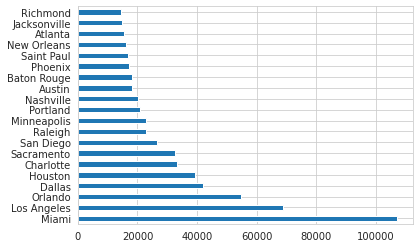

In [22]:
#plotting top 20 cities which creates better visuals
cities_by_accident[:20].plot(kind='barh')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


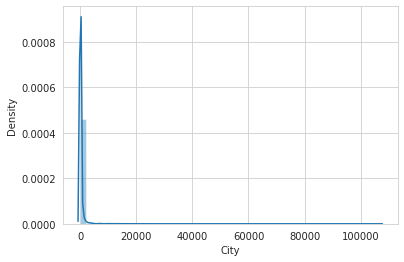

In [23]:
#plotting dist plot to get better idea 
sns.distplot(cities_by_accident)

In [24]:
#the above dist plot doesnt give much insights about the data
#we can take citites with more than 1000 accidents
high_accidents = cities_by_accident[cities_by_accident > 1000]
high_accidents

Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
                ...  
Camden           1009
Victorville      1005
Tualatin         1001
Utica            1001
Los Banos        1001
Name: City, Length: 494, dtype: int64

In [25]:
#checking how much percent of the cities have more than 1000 accidents
percent_high_acc = (len(high_accidents)/ cities.nunique())* 100
percent_high_acc

4.229089975173358

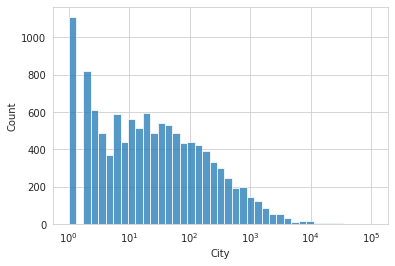

In [26]:
#to get btter insights, plotting hist plot with log scale
sns.histplot(cities_by_accident, log_scale=True)

In [27]:
cities_by_accident[cities_by_accident == 1]

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

In [28]:
cities_by_accident[cities_by_accident < 10]

Brimfield                       9
Huntertown                      9
Vidalia                         9
Sunburst                        9
Steamboat Rock                  9
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 4428, dtype: int64

###Start_Time

In [29]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [30]:
df.Start_Time[0]

'2016-02-08 00:37:08'

In [31]:
#the above data is String datatype in Datetime format
#Changing the datatype to datatime
df.Start_Time = pd.to_datetime(df.Start_Time)
df.Start_Time

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


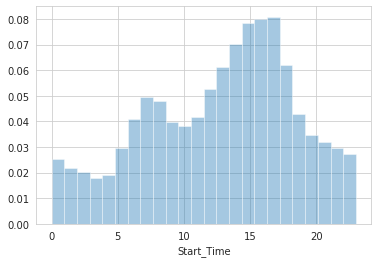

In [32]:
#it is best to visualize the hourly data along with normalizing and bins is 24 as there are 24 hours in a day
sns.distplot(df.Start_Time.dt.hour, bins=24, norm_hist=True ,kde=False)

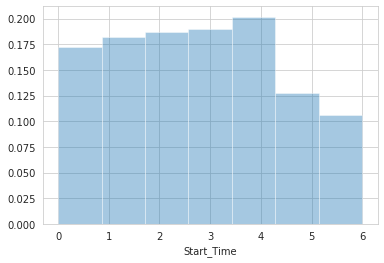

In [33]:
#to know which day of the week the accidents occur more often
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, norm_hist=True, kde=False)

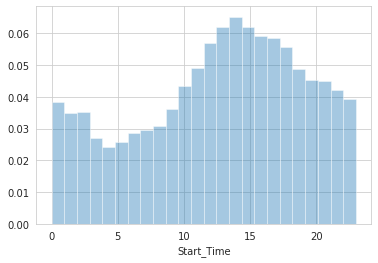

In [34]:
#exploring weekend date(Saturday)
sat_data = df.Start_Time[df.Start_Time.dt.dayofweek==5]
sns.distplot(sat_data.dt.hour, bins=24, norm_hist=True, kde=False)

###Latitude and Longitude

In [35]:
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [36]:
df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

In [37]:
#Creating sample out of main df for getting better visualization of data(10% of total rows)
sample_df = df.sample(int(0.1* len(df)))
sample_df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
1402386,A-1402387,2,2021-12-25 20:37:00,2021-12-25 21:56:27.000000000,33.991270,-117.888878,33.991634,-117.888828,0.025,Incident on NOGALES ST near HOUSE 1425 Expect ...,...,False,False,False,False,False,False,Night,Night,Night,Night
1825696,A-1825697,2,2020-09-10 21:31:30,2020-09-11 00:06:30,38.862525,-77.069010,38.867027,-77.062431,0.471,Stationary traffic on I-395 from VA-27/8th St/...,...,False,False,False,False,False,False,Night,Night,Night,Night
132305,A-132306,3,2016-07-03 19:43:03,2016-07-04 01:43:03,33.849169,-117.816461,33.844480,-117.826050,0.639,At CA-55/Costa Mesa Fwy - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2173664,A-2173665,2,2020-06-15 21:36:06,2020-06-15 22:06:06,42.474480,-83.110530,42.474480,-83.110530,0.000,Ramp to I-696/Walter P Reuther Fwy - Accident....,...,False,False,False,False,False,False,Night,Day,Day,Day
2225015,A-2225016,2,2020-03-28 18:35:56,2020-03-28 19:05:56,35.335200,-80.825010,35.335200,-80.825010,0.000,At W Sugar Creek Rd - Accident.,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282461,A-282462,2,2021-06-01 07:21:10,2021-06-01 09:52:21,35.003399,-81.017475,35.004446,-81.017250,0.073,Incident on INDIA HOOK RD near MT GALLANT RD D...,...,False,False,False,False,True,False,Day,Day,Day,Day
417540,A-417541,2,2021-10-24 23:34:01,2021-10-25 00:54:27,32.750351,-117.130155,32.752196,-117.130157,0.127,Incident on 30TH ST near LINCOLN AVE Drive wit...,...,False,True,False,False,True,False,Night,Night,Night,Night
2814615,A-2814616,2,2019-08-26 16:36:26,2019-08-26 17:04:43,36.261234,-83.174647,36.261537,-83.171358,0.184,At Rogersville - Overturned heavy truck. Lane ...,...,False,False,False,False,False,False,Day,Day,Day,Day
488480,A-488481,2,2021-04-22 17:48:49,2021-04-22 19:30:11.000000000,32.655198,-96.750577,32.654102,-96.756660,0.362,Incident on LBJ WB near BONNIE VIEW RD Drive w...,...,False,False,False,False,False,False,Day,Day,Day,Day


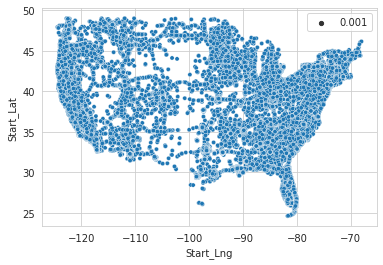

In [38]:
sns.scatterplot(x=sample_df.Start_Lng, y= sample_df.Start_Lat, size=0.001)

#Insights:


* Less than 4.5% of cities or a total of 494 Cities had more than 1000 accidents
* There is no New York city Data in the dataset
* More than 4400 cities have less than 10 Accidents over a period of 6 Years
* During weekdays most of the accidents happened during 06AM to 09AM and 03PM to 06PM may be because this is the time for office and home commute
* Weekend Chart is bell curve quite opposite to weekday accidents and has happened b/w 10AM to 03PM
* Accidents were more in the Coastal areas and centre region seems to be less accident prone zone





